In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('./code')
import get_mta_data as gmd

#### Challenge 1   
  
- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Load the files into a pandas DataFrame (hint: `pd.read_csv()` to load files and `pd.concat()` to combine DataFrames)

In [2]:
#get list of filenames based on month,year
years = [2018]
months = [4]
files = gmd.generate_filenames(years,months)

In [63]:
#get data from files into dataframe named mta
mta_df_list = []
for file in files:
    mta_df_list += [pd.read_csv('../data/raw/'+file)]
mta = pd.concat(mta_df_list, ignore_index=True)

In [64]:
#rename row 10 to 'EXITS'
mta.rename(columns={mta.columns[10]:'EXITS'},inplace=True)

#### Challenge 2

- Let's turn this into a time series.

- Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?), however in python and pandas we can convert date and time information to _datetime_ objects, which allow us to do time-based operations

- Using either [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the `Date` and `Time` columns into a single new column of the datetime datatype

In [111]:
#go to datetime
mta['DATETIME'] = mta.DATE+' '+mta.TIME
mta['DATETIME'] = pd.to_datetime(mta['DATETIME'],format='%m/%d/%Y %H:%M:%S')
mta_sorted = mta.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATETIME'])


#### Challenge 3

- Each row is a turnstile, identified by a combination of  the `C/A`, `UNIT`, `SCP`, and `STATION` columns, with information on entries and exits at that turnstile every n hours. (What is n?) We want total daily entries. 
- Group the data so that it represents **daily entries** for each turnstile (hint: `pd.groupby` or `DataFrame.groupby`)

In [66]:
# get first two times and take hour and subtract
hour0 = mta['DATETIME'].iloc[0].hour
hour1 = mta['DATETIME'].iloc[1].hour
print(f'n = {hour1-hour0}')

n = 4


In [90]:
mta_group = mta.groupby(['C/A', 'UNIT', 'SCP', 'STATION','DATE'])

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Challenge 4

We will plot the daily time series for a single turnstile.

In ipython notebook, add this to the beginning of your next cell:
```
    %matplotlib inline
```
This will make your matplotlib graphs integrate nicely with the
notebook. 

To plot the time series, import matplotlib with
```
    import matplotlib.pyplot as plt
```
- Select one turnstile (combination of [`C/A`, `UNIT`, `SCP`, `STATION`])
- Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
- Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis

You can use the following as a starting point:
```
    plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)

In [97]:
mta_group.groups

{('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '03/31/2018'): Int64Index([591358, 591359, 591360, 591361, 591362, 591363], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/01/2018'): Int64Index([591364, 591365, 591366, 591367, 591368, 591369], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/02/2018'): Int64Index([591370, 591371, 591372, 591373, 591374, 591375], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/03/2018'): Int64Index([591376, 591377, 591378, 591379, 591380, 591381], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/04/2018'): Int64Index([591382, 591383, 591384, 591385, 591386, 591387], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/05/2018'): Int64Index([591388, 591389, 591390, 591391, 591392, 591393], dtype='int64'),
 ('A002',
  'R051',
  '02-00-00',
  '59 ST',
  '04/06/2018'): Int64Index([591394, 591395, 591396, 591397, 591398, 591399], dtype='int64'),
 ('A002',
  'R051',
  '02-0

(array([736785., 736789., 736793., 736797., 736801., 736805., 736809.,
        736813.]), <a list of 8 Text xticklabel objects>)

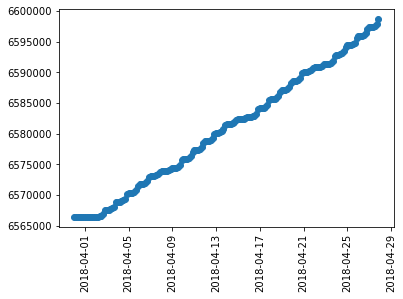

In [115]:
import matplotlib.dates as mdates

ts0 = mta_sorted[(mta_sorted['C/A']=='A002') & 
          (mta_sorted['UNIT']=='R051') & 
          (mta_sorted['SCP']=='02-00-00') & 
          (mta_sorted['STATION']=='59 ST')]
plt.plot_date(ts0['DATETIME'],ts0['ENTRIES'],xdate=True,ydate=False)
plt.xticks(rotation='vertical')

Series([], Name: DATE, dtype: object)